# Preliminary Visualization of Data

## Adapting example code for M6ASP

From example at: https://gist.github.com/adcroft/2a2b91d66625fd534372

We will use matplotlib.pyplot for plotting and scipy's netcdf package for reading the model output. The `%pylab inline` causes figures to appear in the page and conveniently alias pyplot to `plt` (which is becoming a widely used alias).

This analysis assumes you changed DAYMAX to some multiple of 5 so that there are multiple time records in the model output.

In [3]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


We first create a netcdf object, or "handle", to the netcdf file. We'll also list all the objects in the netcdf object. `prof_file.variables` displays all the variables as an ordered dictionary. We see the respective variables in the "example_o1/ocean.0001-0010.ssh.cdl" meta data file (I locally downloaded the example files to the same directory on my machine). The meta data file also contains attributes of the variables that can be called.

For example, the float ssh is a three-dimensional vector with dimentions, time, yh, and xh:

        float ssh(time, yh, xh) ;
		ssh:long_name = "Sea Surface Height" ;
		ssh:units = "m" ;
		ssh:missing_value = -1.e+34f ;
		ssh:_FillValue = -1.e+34f ;
		ssh:cell_measures = "area: area_t" ;
		ssh:cell_methods = "area:mean yh:mean xh:mean time: mean" ;
		ssh:time_avg_info = "average_T1,average_T2,average_DT" ;

In [4]:
prog_file = scipy.io.netcdf_file('example_o1/ocean.0001-0010.ssh.nc')
prog_file.variables

OrderedDict([('nv', <scipy.io.netcdf.netcdf_variable at 0x106470890>),
             ('ssh', <scipy.io.netcdf.netcdf_variable at 0x1030ecb90>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x1030ecc10>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x106470c10>),
             ('xh', <scipy.io.netcdf.netcdf_variable at 0x106470d10>),
             ('yh', <scipy.io.netcdf.netcdf_variable at 0x106470dd0>),
             ('average_T1', <scipy.io.netcdf.netcdf_variable at 0x106470ed0>),
             ('average_T2', <scipy.io.netcdf.netcdf_variable at 0x106470f90>),
             ('average_DT', <scipy.io.netcdf.netcdf_variable at 0x1064800d0>)])

Now we will create a variable object for the "time" variable in the file. Again, I'm labelling it as a handle to distinguish it from a numpy array or raw data.

We'll also look at an "attribute" and print the shape of the data.

In [63]:
time_handle = prog_file.variables['time']
print('Description =', time_handle.long_name)
print('Shape =',time_handle.shape)

Description = time
Shape = (10,)


We see that "time" has one attribute: time. From the shape, we see that it is a one-dimensional vector that represents the time in "days since 0001-01-01 00:00:00" according to the .cdl file. We do the same for the ssh variable as we want to visualize data about sea surface height.

In [17]:
ssh_handle = prog_file.variables['ssh']
print('Description =', ssh_handle.long_name)
print('Cell methods =', ssh_handle.cell_methods)
print('Shape =',ssh_handle.shape)

# apparently cell_methods is a string
# print type(ssh_handle.cell_methods)

('Description =', 'Sea Surface Height')
('Cell methods =', 'area:mean yh:mean xh:mean time: mean')
('Shape =', (10, 320, 360))


On the example, the data is in 4 dimensions (time-, vertical-, meridional-, zonal-axes). We only had time and x, y coordinates. Additionally, playing arround with different slices showed that `ssh_handle[0]` had a 2-dimensional shape whereas `ssh_handle[1]` has a 1-dimensional shape.

>I'm still not entirely sure what the data in `ssh_handle[0]` represents (I'm assuming the x and y coordinates at time 0?). Playing around with ssh_handle after seeing as it was a numpy array helped me see that `ssh_handle[0]` had a 2-dimensional shape

In [40]:
print(ssh_handle[0].shape)

(320, 360)


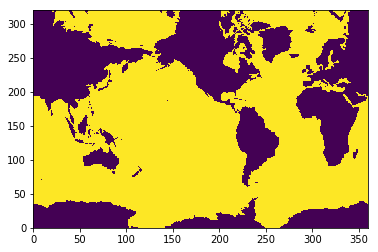

In [60]:
plt.pcolormesh( ssh_handle[0] );

After plotting the data with `pcolormesh`, we will add a scale and change the colormap. We will also suppress the "`<matplotlib...>`" by using a semicolon.

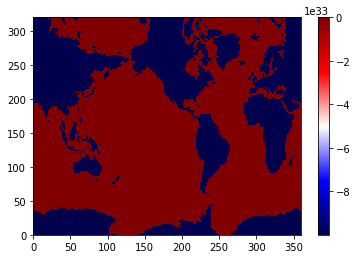

In [41]:
plt.pcolormesh( ssh_handle[0], cmap=cm.seismic ); plt.colorbar();

This changes the coloring to what was specified by `cmap=cm.seismic`. As with the example, we are currently also looking at 4D data being projected onto a 2D medium. We follow the tutorial.

In [43]:
import ipywidgets

In [45]:
[ssh_handle[0].min(), ssh_handle[0].max()]

[-1e+34, 1.1518394]

>I copied what was there before, accounting for the fact that I was only slicing once.

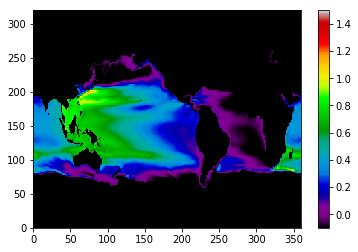

In [61]:
def plot_ssh(record):
    plt.pcolormesh( ssh_handle[record], cmap=cm.spectral )
    plt.clim(-.1,1.5) # Fixed scale here based on above output
    plt.colorbar()

ipywidgets.interact(plot_ssh, record=(0,ssh_handle.shape[0]-1));

We use a loop to redraw the plot as seen from the example code.

In [54]:
from IPython import display

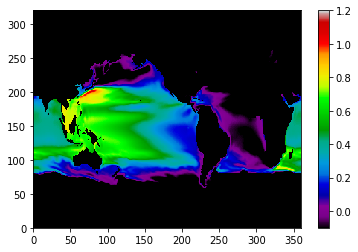

In [58]:
for n in range( ssh_handle.shape[0]):
    display.display(plt.gcf())
    plt.clf()
    plot_ssh(n)
    display.clear_output(wait=True)